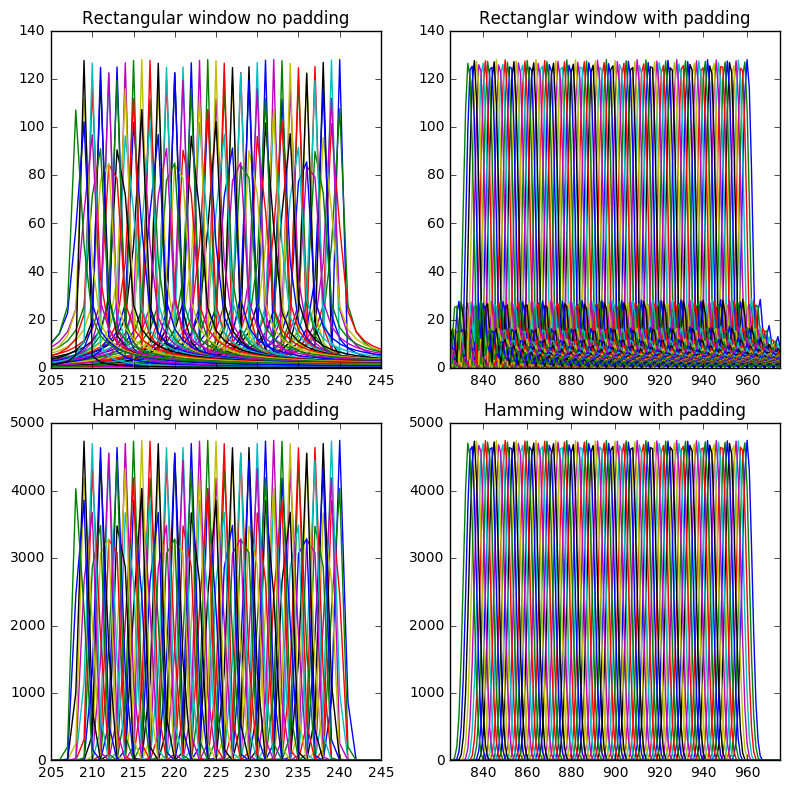

In [137]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
%matplotlib inline

N = 256;                 # length of test signals
N_zp = 1024;
num_freqs = 100;         # number of frequencies to test

# Generate vector of frequencies to test
omega = np.pi/8 + np.linspace(0,num_freqs-1,num_freqs)/num_freqs*np.pi/4;

S = np.zeros([N,num_freqs]);                        # matrix to hold FFT results
S_zp_rect = np.zeros([N_zp,num_freqs]);
S_ham = np.zeros([N, num_freqs]);
S_zp_ham = np.zeros([N_zp,num_freqs]);

plt.figure(figsize=(8, 8))

# Rect no pad
plt.subplot(2,2,1)
for i in range(0,len(omega)):                       # loop through freq. vector
    s = np.sin(omega[i]*np.linspace(0,N-1,N));      # generate test sine wave
    win = signal.boxcar(N);                         # use rectangular window
    s = s*win;                                      # multiply input by window
    S[:,i] = np.abs(np.fft.fft(s));      # generate magnitude of FFT
                                                    # and store as a column of S
plt.plot(S);                                        # plot all spectra on same graph
plt.title("Rectangular window no padding")
plt.xlim(205,245)

# Rect pad
plt.subplot(2,2,2)
for i in range(0, len(omega)):
    s = np.sin(omega[i]*np.linspace(0, N-1, N));
    win = signal.boxcar(N)
    s = s*win;
    S_zp_rect[:,i] = np.abs(np.fft.fft(s, n=1024))
    
plt.plot(S_zp_rect);
plt.title("Rectanglar window with padding")
plt.xlim(825,975)

# Ham no padding
plt.subplot(2,2,3)
for i in range(0, len(omega)):
    s = np.sin(omega[i]*np.linspace(0, N-1, N));
    win = signal.hamming(N)
    s = s*win;                          
    S_ham[:,i] = np.square(np.abs(np.fft.fft(s)));
    
plt.plot(S_ham);
plt.title("Hamming window no padding")
plt.xlim(205,245)


# Ham padding

plt.subplot(2,2,4)
for i in range(0, len(omega)):
    s = np.sin(omega[i]*np.linspace(0, N-1, N));
    win = signal.hamming(N)
    s = s*win;
    S_zp_ham[:,i] = np.square(np.abs(np.fft.fft(s, n=1024)))
    
plt.plot(S_zp_ham);
plt.title("Hamming window with padding")
plt.xlim(825,975)

plt.tight_layout()

Windowing a signal for spectral analysis decreases the height of the sidelobes by expanding the width of the main lobe. This results in better peak resolution, but it becomes harder to distinguish closely paced sinusoids. Zero padding gives us a longer FFT result vector, which has more frequency bins that are more closely spaced in frequency. It does not increase frequency resolution, but it does provide us a high quality since interpolation of a shorter signal that might result in a smoother looking specturm.  

The DTFT is not actually computable by real life systems, since it requires taking an infinite number of samples around the unit circle. The DFT is a sampled version of the DFTF, calculated using a discrete number of samples around the unit circle. 

## Magnitude of frequency output

(1800, 2200)

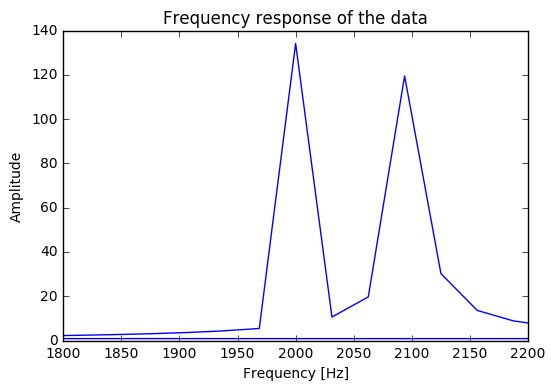

In [152]:
n = np.arange(256)
n = np.sin(2.*np.pi*2000*n/8000) + np.sin(2.*np.pi*2100*n/8000) 

    
trans = np.fft.fft(n)
mag = np.abs(trans)
freq = np.fft.fftfreq(256, 1/8000)
plt.plot(freq, mag)
plt.title('Frequency response of the data')
plt.xlabel('Frequency [Hz]')
plt.ylabel('Amplitude')
plt.xlim(1800, 2200)



## Frequency Resolution

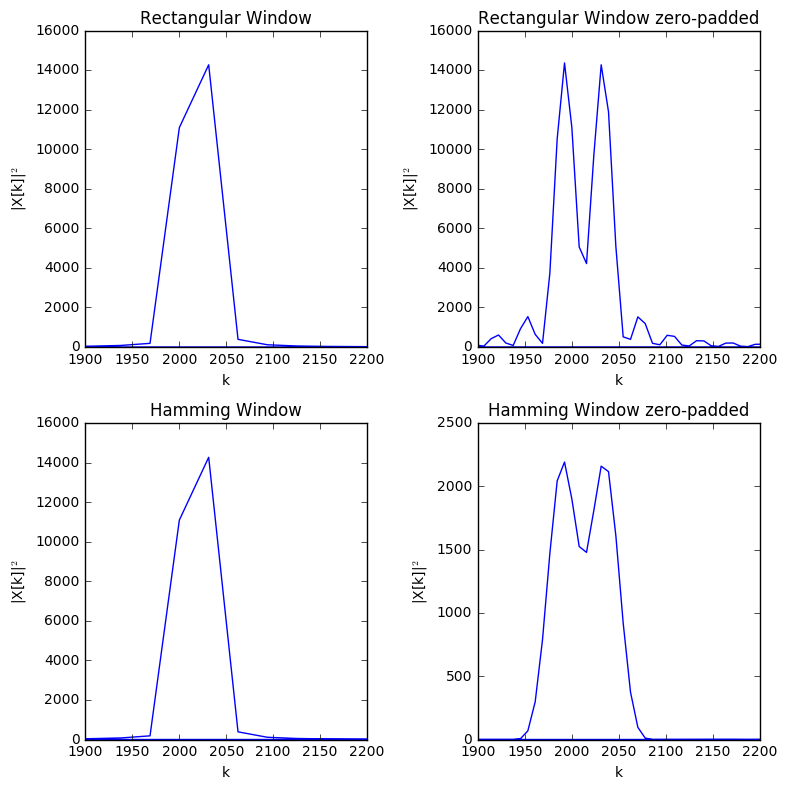

In [156]:
freq_zp = np.fft.fftfreq(1024, 1/8000)

n = np.arange(256)
n = np.sin(2.*np.pi*2000*n/8000) + np.sin(2.*np.pi*2025*n/8000) 

plt.figure(figsize=(8, 8))

# Rectangular Window
win = signal.boxcar(N);                         
s = n*win;                                      
S_rect = np.square(np.abs(np.fft.fft(s)));  

plt.subplot(2, 2, 1)
plt.plot(freq, S_rect)                                       
plt.title('Rectangular Window')
plt.xlabel('k')
plt.ylabel('|X[k]|$^2$')
plt.xlim(1900,2200)

# Rectangular window zero padded

win = signal.boxcar(N);                         
s = n*win;                                      
S_zp_rect = np.square(np.abs(np.fft.fft(s, n=1024)));  

plt.subplot(2, 2, 2)
plt.plot(freq_zp, S_zp_rect)                                       
plt.title('Rectangular Window zero-padded')
plt.xlabel('k')
plt.ylabel('|X[k]|$^2$')
plt.xlim(1900,2200)


# Hamming
win = signal.hamming(N)
s = n*win;
S_ham = np.square(np.abs(np.fft.fft(s)));

plt.subplot(2, 2, 3)
plt.plot(freq, S_rect)                                       
plt.title('Hamming Window')
plt.xlabel('k')
plt.ylabel('|X[k]|$^2$')
plt.xlim(1900,2200)

# Hamming window zero padded

win = signal.hamming(N);                         
s = n*win;                                      
S_zp_ham = np.square(np.abs(np.fft.fft(s, n=1024)));  

plt.subplot(2, 2, 4)
plt.plot(freq_zp, S_zp_ham)                                       
plt.title('Hamming Window zero-padded')
plt.xlabel('k')
plt.ylabel('|X[k]|$^2$')
plt.xlim(1900,2200)


plt.tight_layout()

The closest frequency I'm able to resolve is 2025 Hz. The rectangular window is the best for this situation, since the signal has no sidelobes on the frequency peaks. For this case it only widens the main lobes and gives a greater overlap of the two sinusoid peaks. The zero-padded signal is provides the best response, as the longer FFT allows use to resolve closer frequencies better.

## Spectrogram

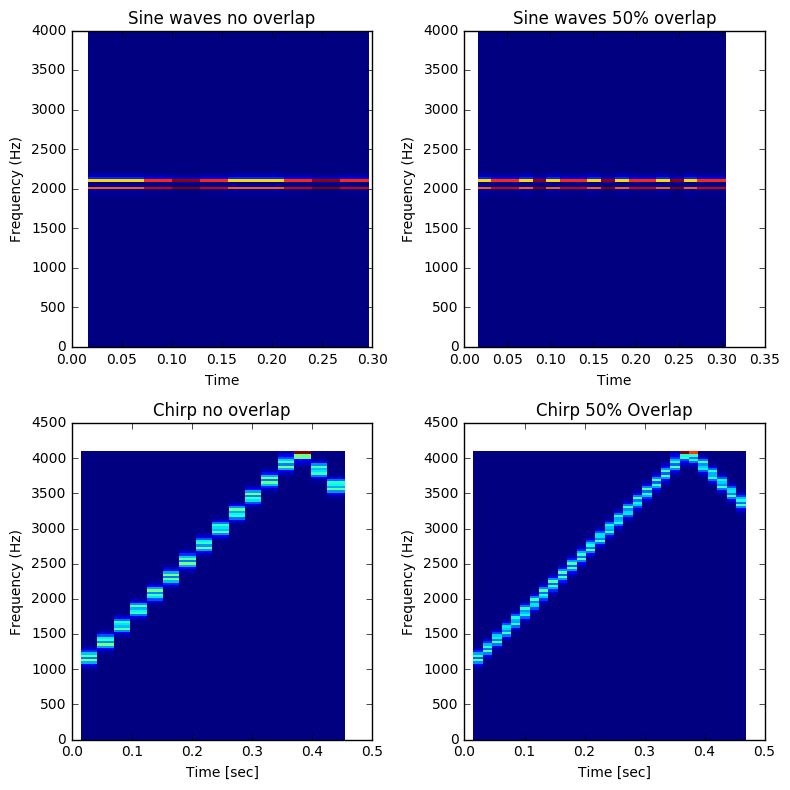

In [128]:
from IPython.display import Audio 


t1 = np.linspace(0,0.5,4001) 
chirp = signal.chirp(t1,1000,0.5,5000) # Frequency-sweep signal
Audio(s,rate=8192) # Default rate is 8192Hz

f1 = 2000 
f2 = 2100 
fs = 8000
N = 2560
n = np.linspace(0,N-1,N)
xn = np.sin(2*np.pi*f1/fs*n) + np.sin(2*np.pi*f2/fs*n)

plt.figure(figsize=(8, 8))

# Sine Waves with no overlap
f,t,Sxx = signal.spectrogram(xn,fs,nperseg=256,noverlap=None)
plt.subplot(2, 2, 1)
plt.pcolormesh(t,f,Sxx) 
plt.title('Sine waves no overlap')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time')

# Sine waves with 50% overlap
f,t,Sxx = signal.spectrogram(xn,fs,nperseg=256,noverlap=128)
plt.subplot(2, 2, 2)
plt.pcolormesh(t,f,Sxx) 
plt.title('Sine waves 50% overlap')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time')

# Chirp with no overlap
f,t,Sxx = signal.spectrogram(chirp,8192,nperseg=256,noverlap=None)
plt.subplot(2, 2, 3)
plt.pcolormesh(t,f,Sxx) 
plt.title('Chirp no overlap')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time [sec]')

# Chirp with 50% overlap
f,t,Sxx = signal.spectrogram(chirp,8192,nperseg=256,noverlap=128)
plt.subplot(2, 2, 4)
plt.pcolormesh(t,f,Sxx) 
plt.title('Chirp 50% Overlap')
plt.ylabel('Frequency (Hz)')
plt.xlabel('Time [sec]')

plt.tight_layout()




Overlap means each FT segment overlaps the data in the previous segment when calculating the FT, resulting in a more continous graph.

At 0.4 seconds, the signal of the frequency goes past the Nyquist frequency, so we're seeing aliasing occur. 